## Perkenalan

<b>Name: </b>Rohmad <br/>
<b>Type: </b>Graded Challenge 3 <br/>
<b>Dataset: </b> You'll find most useful data for project analysis. Columns are self explanatory except:
usd_pledged: conversion in US dollars of the pledged column (conversion done by kickstarter).
usd pledge real: conversion in US dollars of the pledged column (conversion from Fixer.io API).
usd goal real: conversion in US dollars of the goal column (conversion from Fixer.io API).<br/>
https://www.kaggle.com/kemical/kickstarter-projects?select=ks-projects-201801.csv <br/>
<b>Objective: </b>Does the category type affect usd_goal_real or not?

## Import Module

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import kurtosis
from numpy import percentile

%matplotlib inline

## Data Loading

In [5]:
df_raw = pd.read_csv('./ks-projects-201801.csv')

In [6]:
print(df_raw.shape)
df_raw.head()

(378661, 15)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 31.8+ MB


In [8]:
df_raw.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


## Data Cleaning

In [9]:
df_raw.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

##### Delete missing value

In [10]:
df_raw.dropna(inplace=True)

In [11]:
df_raw.isna().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

#### Deleted column

In [12]:
df_raw.drop(['deadline', 'backers','pledged','usd pledged','usd_pledged_real'], axis = 1, inplace=True)

In [13]:
df_raw.head()

,ID,name,category,main_category,currency,goal,launched,state,country,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,1000.0,2015-08-11 12:12:28,failed,GB,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,30000.0,2017-09-02 04:43:57,failed,US,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,45000.0,2013-01-12 00:20:50,failed,US,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,5000.0,2012-03-17 03:24:11,failed,US,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,19500.0,2015-07-04 08:35:03,canceled,US,19500.00


In [14]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             374860 non-null  int64  
 1   name           374860 non-null  object 
 2   category       374860 non-null  object 
 3   main_category  374860 non-null  object 
 4   currency       374860 non-null  object 
 5   goal           374860 non-null  float64
 6   launched       374860 non-null  object 
 7   state          374860 non-null  object 
 8   country        374860 non-null  object 
 9   usd_goal_real  374860 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 21.4+ MB


### Preprocessing

##### Display normal distribution or not

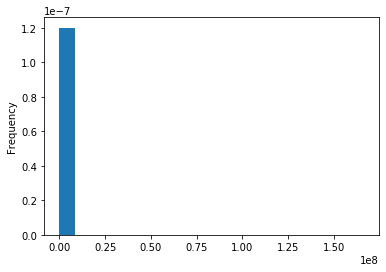

In [15]:
df_raw['usd_goal_real'].plot.hist(bins=20, density=True)

It can be seen that the distribution is not normal, there is an anomaly in the usd_goal_real, then we will detect for outliers below

### Outlier Detection

##### Finding the observations for each quartile as well as the minimum and maximum observed values from the data sample.

In [16]:
quartiles = np.percentile(df_raw['usd_goal_real'], [25, 50, 75])
print(quartiles)

[ 2000.  5500. 16000.]


In [17]:
data_min, data_max = df_raw['usd_goal_real'].min(), df_raw['usd_goal_real'].max()
print(data_min)
print(data_max)
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

0.01
166361390.71
Min: 0.010
Q1: 2000.000
Median: 5500.000
Q3: 16000.000
Max: 166361390.710


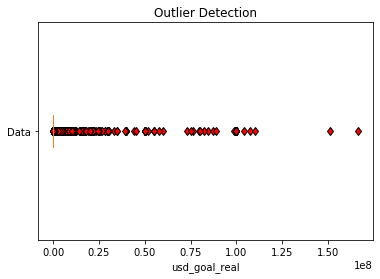

In [18]:
plt.boxplot(df_raw['usd_goal_real'],
            labels=['Data'],
            showfliers=True,
            vert=False,
            flierprops={
                'markerfacecolor': 'r',
                'marker': 'd'
            })
plt.title('Outlier Detection')
plt.xlabel('usd_goal_real')
plt.ylabel('')
plt.show()

##### Using Tukey's rule for Outlier Detection
##### q3+1.5∗IQR

In [19]:
out_abv = quartiles[2]+1.5*(quartiles[2]-quartiles[0])
out_abv

37000.0

#### Remove Outlier 1
Remove outlier where usd_real_goal above 37000

In [20]:
df_filt = df_raw[df_raw['usd_goal_real'] <= 37000]
df_filt.head()

,ID,name,category,main_category,currency,goal,launched,state,country,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,1000.0,2015-08-11 12:12:28,failed,GB,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,30000.0,2017-09-02 04:43:57,failed,US,30000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,5000.0,2012-03-17 03:24:11,failed,US,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,19500.0,2015-07-04 08:35:03,canceled,US,19500.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,1000.0,2014-12-01 18:30:44,successful,US,1000.00


Now the data look better with histogram

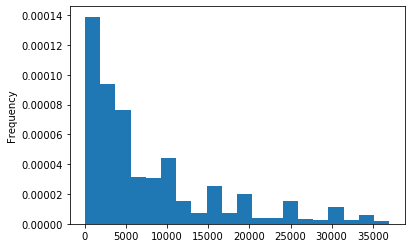

In [21]:
df_filt['usd_goal_real'].plot.hist(bins=20, density=True)

And also looks better, with boxplot

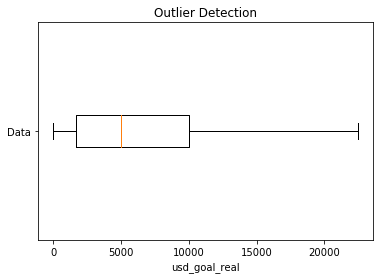

In [22]:
plt.boxplot(df_filt['usd_goal_real'],
            labels=['Data'],
            showfliers=False,
            vert=False,
            flierprops={
                'markerfacecolor': 'r',
                'marker': 'd'
            })
plt.title('Outlier Detection')
plt.xlabel('usd_goal_real')
plt.ylabel('')
plt.show()

In [23]:
df_filt.groupby('main_category').count()

,ID,name,category,currency,goal,launched,state,country,usd_goal_real
main_category,,,,,,,,,
Art,26718,26718,26718,26718,26718,26718,26718,26718,26718
Comics,10466,10466,10466,10466,10466,10466,10466,10466,10466
Crafts,8427,8427,8427,8427,8427,8427,8427,8427,8427
Dance,3650,3650,3650,3650,3650,3650,3650,3650,3650
Design,24609,24609,24609,24609,24609,24609,24609,24609,24609
Fashion,21004,21004,21004,21004,21004,21004,21004,21004,21004
Film & Video,53363,53363,53363,53363,53363,53363,53363,53363,53363
Food,20340,20340,20340,20340,20340,20340,20340,20340,20340
Games,29799,29799,29799,29799,29799,29799,29799,29799,29799


#### Remove Outlier 2
Remove main_category with smallest usd_goal_real

In [24]:
df_grp_cat = df_filt.groupby('main_category').count().reset_index()[[
    'main_category', 'usd_goal_real'
]].sort_values('usd_goal_real', ascending=False)
df_grp_cat['main_cat_count'] = df_grp_cat['usd_goal_real'].cumsum()
df_grp_cat['pcg_sum'] = df_grp_cat['main_cat_count'] / df_grp_cat[
    'main_cat_count'].max()
df_grp_cat = df_grp_cat[df_grp_cat['pcg_sum'] <= 0.95]

In [25]:
df_filt = df_filt[df_filt['main_category'].isin(df_grp_cat['main_category'])]

##### Now we have 95% available data, to be processed

In [26]:
print(df_filt.shape)

(303540, 10)


## Measure of Central Tendency

In [27]:
print(df_filt['usd_goal_real'].describe())

count    303540.000000
mean       7986.848436
std        8352.975542
min           0.010000
25%        1900.000000
50%        5000.000000
75%       10200.000000
max       37000.000000
Name: usd_goal_real, dtype: float64


#### Measure of Central Tendency Mean

In [28]:
print(df_filt['usd_goal_real'].mean())

7986.848436021613


#### Measure of Central Tendency Median

In [29]:
print(df_filt['usd_goal_real'].median())

5000.0


#### Measure of Central Tendency Modus

In [30]:
print(df_filt['usd_goal_real'].mode())

0    5000.0
dtype: float64


### Measure of Variance

#### Measure of Variance Range

In [31]:
numcols = ['goal', 'usd_goal_real']
for col in numcols:
    print(df_filt[col].name + ' range: ' + str(df_filt[col].max() - df_filt[col].min()))

goal range: 2999999.99
usd_goal_real range: 36999.99


#### Measure of Variance

In [32]:
print(df_filt['usd_goal_real'].var())

69772200.39884529


#### Measure of Variance Standard Deviation

In [33]:
print(df_filt['usd_goal_real'].std())

8352.97554161661


Display with Plot

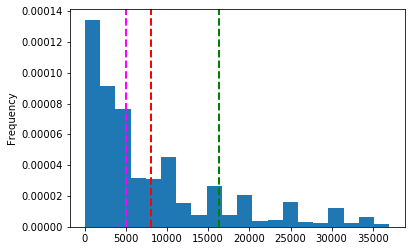

In [34]:
df_filt['usd_goal_real'].plot.hist(bins=20, density=True)
plt.axvline(df_filt['usd_goal_real'].describe()['mean'],
            color='red',
            linestyle='dashed',
            linewidth=2)
plt.axvline(df_filt['usd_goal_real'].describe()['50%'],
            color='magenta',
            linestyle='dashed',
            linewidth=2)
plt.axvline(df_filt['usd_goal_real'].describe()['mean'] +
            df_filt['usd_goal_real'].describe()['std'],
            color='green',
            linestyle='dashed',
            linewidth=2)

##### Distribution Fit

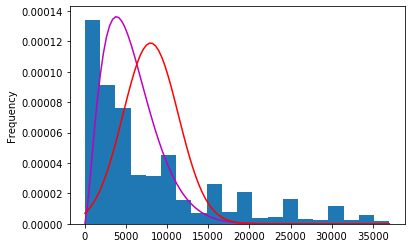

In [35]:
from scipy.stats import beta as beta_fun

fig, ax = plt.subplots(1, 1)
df_filt['usd_goal_real'].plot.hist(bins=20, density=True)

alpha = 2.5
beta = 14
x = np.linspace(0, 1, 100)
plt.plot(37000 * x,
         beta_fun.pdf(x, alpha, beta) / 37000,
         'm-',
         lw=1.5,
         alpha=1,
         label='norm pdf')

x = np.linspace(0, 37000, 100)
plt.plot(x,
         norm.pdf(x, df_filt['usd_goal_real'].describe()['mean'],
                  df_filt['usd_goal_real'].describe()['std'] - 5000),
         'r-',
         lw=1.5,
         alpha=1,
         label='expon pdf')

In [36]:
Exp_value = alpha/(alpha+beta)*37000
print(Exp_value)

5606.060606060606


#### Confidence Interval

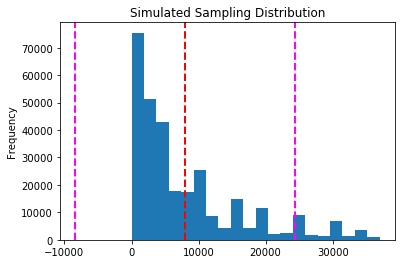

Sampling Mean: 7986.848436021613
Sampling StdErr: 8352.97554161661
95% Confidence Interval: (-8384.682789290893, 24358.37966133412)


In [48]:
means = df_filt['usd_goal_real']
m = means.mean()
sd = means.std()
ci = stats.norm.interval(0.95, m, sd)

# Plot the distribution, mean, and CI
means.plot.hist(title='Simulated Sampling Distribution', bins=20) 
plt.axvline(m, color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=2)
plt.show()

# Print the Mean, StdDev and 95% CI
print ('Sampling Mean: ' + str(m))
print ('Sampling StdErr: ' + str(sd))
print ('95% Confidence Interval: ' + str(ci))

### Two Sample Test

##### It is applied to compare whether the mean difference between the two groups is really significant or whether it is due to random chance. This helps to answer questions such as whether the category type has a significant mean to usd_goal_real

In [38]:
df_make_smy=df_filt.groupby('main_category').agg({'usd_goal_real':['count','mean']}).reset_index()
df_make_smy.columns = df_make_smy.columns.droplevel()

In [39]:
df_make_smy.sort_values('count',ascending=False).head()

,,count,mean
4,Film & Video,53363,8356.331284
7,Music,47628,5985.505483
9,Publishing,37456,6746.490975
6,Games,29799,8911.001199
0,Art,26718,5005.574908


In [40]:
df_film = df_filt[df_filt['main_category'] == 'Film & Video']
df_music = df_filt[df_filt['main_category'] == 'Games']

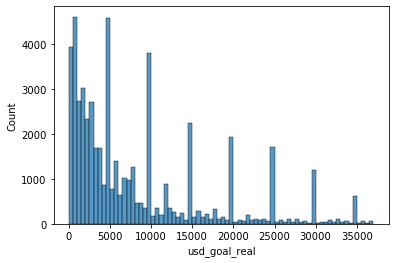

In [46]:
sns.histplot(df_film['usd_goal_real'])

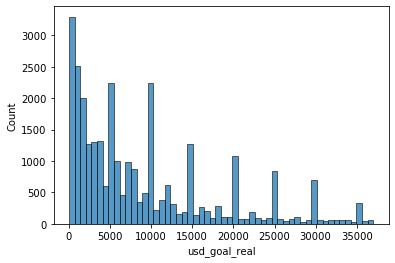

In [42]:
sns.histplot(df_music['usd_goal_real'])

Film & Videos sample mean:8356.331283660962
Film & Videos sample std:8542.105706562734
Film & Videos Kurtosis:1.1666492277681622
Music sample mean:8911.001199033522
t-statistic:8.838123608456554
p-value:0.000000


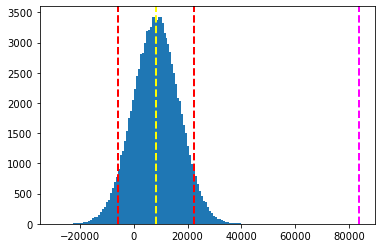

In [50]:
np.random.seed(123)
nonMath =df_film['usd_goal_real']
math = df_music['usd_goal_real']
print("Film & Videos sample mean:" + str(nonMath.mean()))
print("Film & Videos sample std:" + str(nonMath.std()))
print("Film & Videos Kurtosis:" + str(nonMath.kurtosis()))
print("Music sample mean:" + str(math.mean()))

# Independent T-Test
t,p = stats.ttest_ind(math, nonMath,equal_var=False)
# ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)

#2-tailed
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(nonMath.mean(), nonMath.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, nonMath.mean(), nonMath.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() +  t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

## Pengambilan Kesimpulan

The null hypothesis (H0) is that the average score for entertainment in the Movies & Videos category with entertainment in the Music category is not greater than the average value for entertainment in the Music category, and the fact that our sample average for entertainment in the Movies & Videos category is higher than our sample mean for Music category entertainment can be explained randomly in our sample selection.

The alternative hypothesis (H1) is that the population average value of entertainment in the Film & Videos category closest to the real goal is greater than the population average value of music entertainment.

$$
\begin{equation}H_{0}: \mu_{1} \le \mu_{2} \\ H_{1}: \mu_{1} > \mu_{2} \end{equation}
$$

\begin{equation}\mu_{1}: FilmVideos
\end{equation}

\begin{equation}\mu_{2}: Music
\end{equation}

It is proven that the entertainment category of the Film&Video type has a higher average value than the average value of the entertainment category of the Music type. This proves that we accept H1 and reject H0.